In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd

In [22]:
path = "./output/mnist/z_ass/"

label_dist_files = ["1z_rnd_num_client300.part30.partition_noniid90_nclient300.npy.label_dist_across_servers.csv",
           "g_nw_d_minkowski_p1.0_MLP2_G10_partition_noniid90_nclient300.npy.part.30.label_dist_across_servers.csv",
            "g_nw_d_minkowski_p1.0_MLP2_G10_partition_noniid90_nclient300.npy.part.30.swap.NUM_ITERATIONS.23.csv.label_dist_across_servers.csv",
            #"1z_MIP_n300part10.csv.label_dist_across_servers.csv",
            #"z_MIP_n300part10.csv.label_dist_across_servers.csv"
            "z_MIP_wPCA_MLP2_G10_partition_noniid90_nclient300.csv.part30.label_dist_across_servers.csv"
          ]

nlines = 30 #10 servers
fontsize = 20

In [23]:
df_rnd_label_dist = pd.read_csv(path + label_dist_files[0])
df_metis_label_dist = pd.read_csv(path + label_dist_files[1])
df_mip_label_dist = pd.read_csv(path + label_dist_files[2])
df_mip_label_dist2 = pd.read_csv(path + label_dist_files[3])

print(df_rnd_label_dist.shape)
print(df_metis_label_dist.shape)
print(df_mip_label_dist.shape)
print(df_mip_label_dist2.shape)

df_rnd_label_dist.dropna(inplace = True)
df_metis_label_dist.dropna(inplace = True)
df_mip_label_dist.dropna(inplace = True)
df_mip_label_dist2.dropna(inplace = True)

print(df_mip_label_dist)
#print(df_metis_label_dist.shape)



(297, 3)
(296, 3)
(300, 3)
(299, 3)
     metis_server_id  label_id  img_count
0                  0         0        375
1                  0         1         49
2                  0         2         18
3                  0         3        201
4                  0         4        373
..               ...       ...        ...
295               29         5          3
296               29         6         18
297               29         7        201
298               29         8        199
299               29         9        555

[300 rows x 3 columns]


In [24]:
rnd_lines, metis_lines, mip_lines, mip_lines2 = [], [], [],[]
n_zfiles = len(label_dist_files)

for i in range(nlines):
    
    x = (df_rnd_label_dist.loc[df_rnd_label_dist['rnd_server_id'] == i]['label_id'].values.squeeze())
    y = pd.to_numeric(df_rnd_label_dist.loc[df_rnd_label_dist['rnd_server_id'] == i]['img_count'].values.squeeze())
    
    rnd_lines.append([x,y])

for i in range(nlines):
    
    x = (df_metis_label_dist.loc[df_metis_label_dist['metis_server_id'] == i]['label_id'].values.squeeze())
    y = pd.to_numeric(df_metis_label_dist.loc[df_metis_label_dist['metis_server_id'] == i]['img_count'].values.squeeze())
    
    metis_lines.append([x,y])

for i in range(nlines):
    
    x = (df_mip_label_dist.loc[df_mip_label_dist['metis_server_id'] == i]['label_id'].values.squeeze())
    y = pd.to_numeric(df_mip_label_dist.loc[df_mip_label_dist['metis_server_id'] == i]['img_count'].values.squeeze())
    
    mip_lines.append([x,y])

for i in range(nlines):
    
    x = (df_mip_label_dist2.loc[df_mip_label_dist2['mip_server_id'] == i]['label_id'].values.squeeze())
    y = pd.to_numeric(df_mip_label_dist2.loc[df_mip_label_dist2['mip_server_id'] == i]['img_count'].values.squeeze())
    
    mip_lines2.append([x,y])


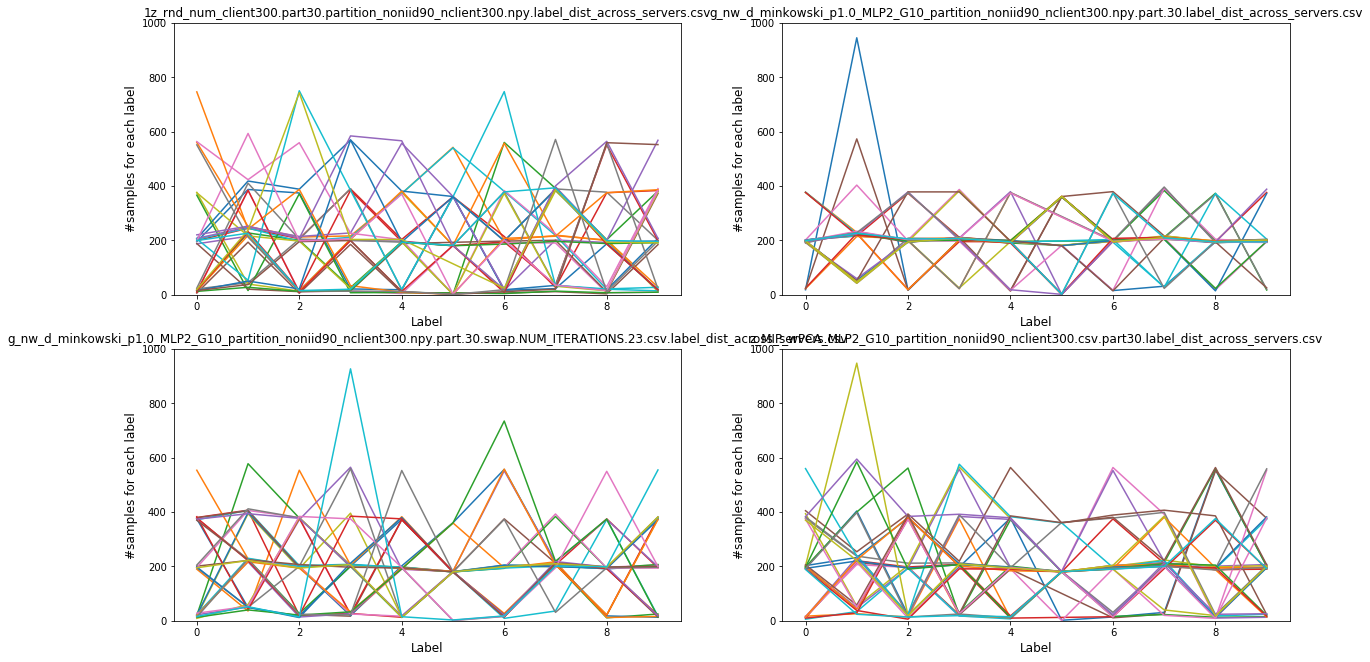

In [28]:
#fig, axs = plt.subplots(n_zfiles+1, n_pfiles, figsize=(20,15))
fig, axs = plt.subplots(2,2, figsize=(20,11))
ymax = 1000
#axs[0,0].figure.set_dpi(500)
#axs[0,1].figure.set_dpi(500)

axs[0,0].set_title(label_dist_files[0], size=12) #random assignment
for i in range(nlines):
    axs[0,0].plot(rnd_lines[i][0], rnd_lines[i][1])

axs[0,0].set_ylabel("#samples for each label", size=12)
axs[0,0].set_xlabel("Label", size=12)
axs[0,0].set_ylim(ymin = 0, ymax=ymax)

#axs[0,0].set_ylim(ymin = 10, ymax=1100)
#axs[0,0].xticks(fontsize=12)
#axs[0,0].yticks(fontsize=12)

axs[0,1].set_title(label_dist_files[1], size=12) #metis assignment
for i in range(nlines):
    axs[0,1].plot(metis_lines[i][0], metis_lines[i][1])

axs[0,1].set_ylabel("#samples for each label", size=12)
axs[0,1].set_xlabel("Label", size=12)
axs[0,1].set_ylim(ymin = 0, ymax=ymax)

#axs[0,1].set_ylim(ymin = 20, ymax=1100)
#axs[0,1].set_xticks(fontsize=12)
#axs[0,1].set_yticks(fontsize=12)


axs[1,0].set_title(label_dist_files[2], size=12) #mip assignment

for i in range(nlines):
    axs[1,0].plot(mip_lines[i][0], mip_lines[i][1])#, label = str(i + 1))

axs[1,0].set_ylabel("#samples for each label", size=12)
axs[1,0].set_xlabel("Label", size=12)
axs[1,0].set_ylim(ymin = 0, ymax=ymax)
#axs[1,0].legend()


axs[1,1].set_title(label_dist_files[3], size=12) #mip assignment
for i in range(nlines):
    axs[1,1].plot(mip_lines2[i][0], mip_lines2[i][1])

axs[1,1].set_ylabel("#samples for each label", size=12)
axs[1,1].set_xlabel("Label", size=12)
axs[1,1].set_ylim(ymin = 0, ymax=ymax)

        
plt.show()

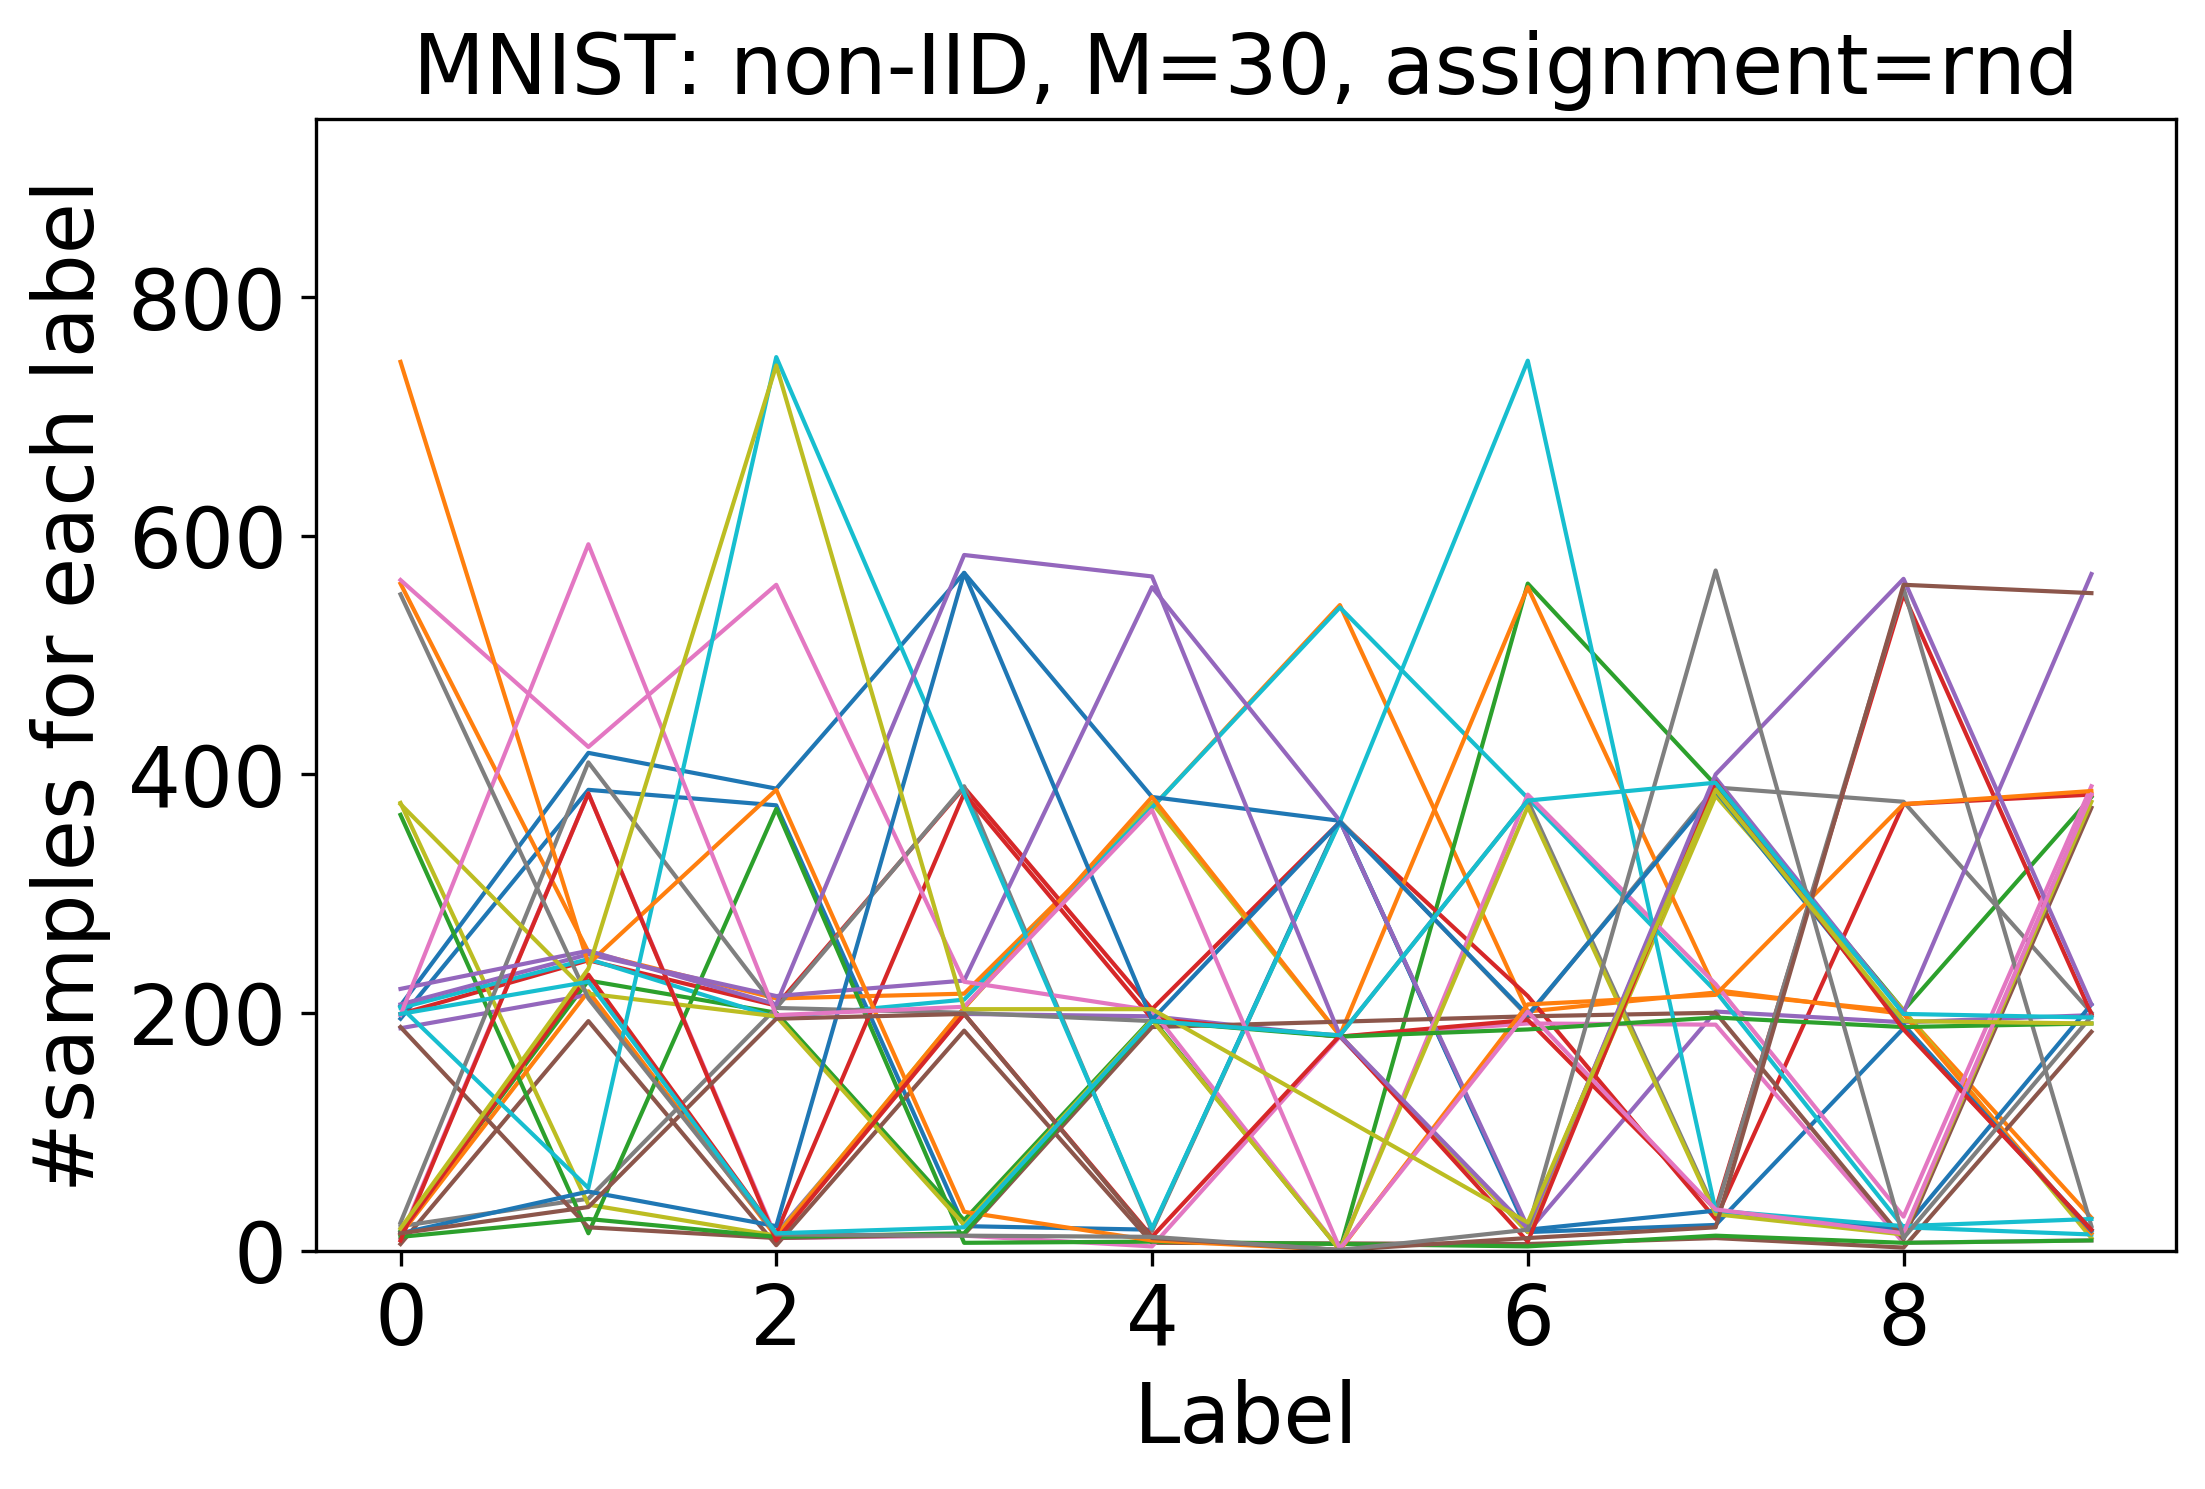

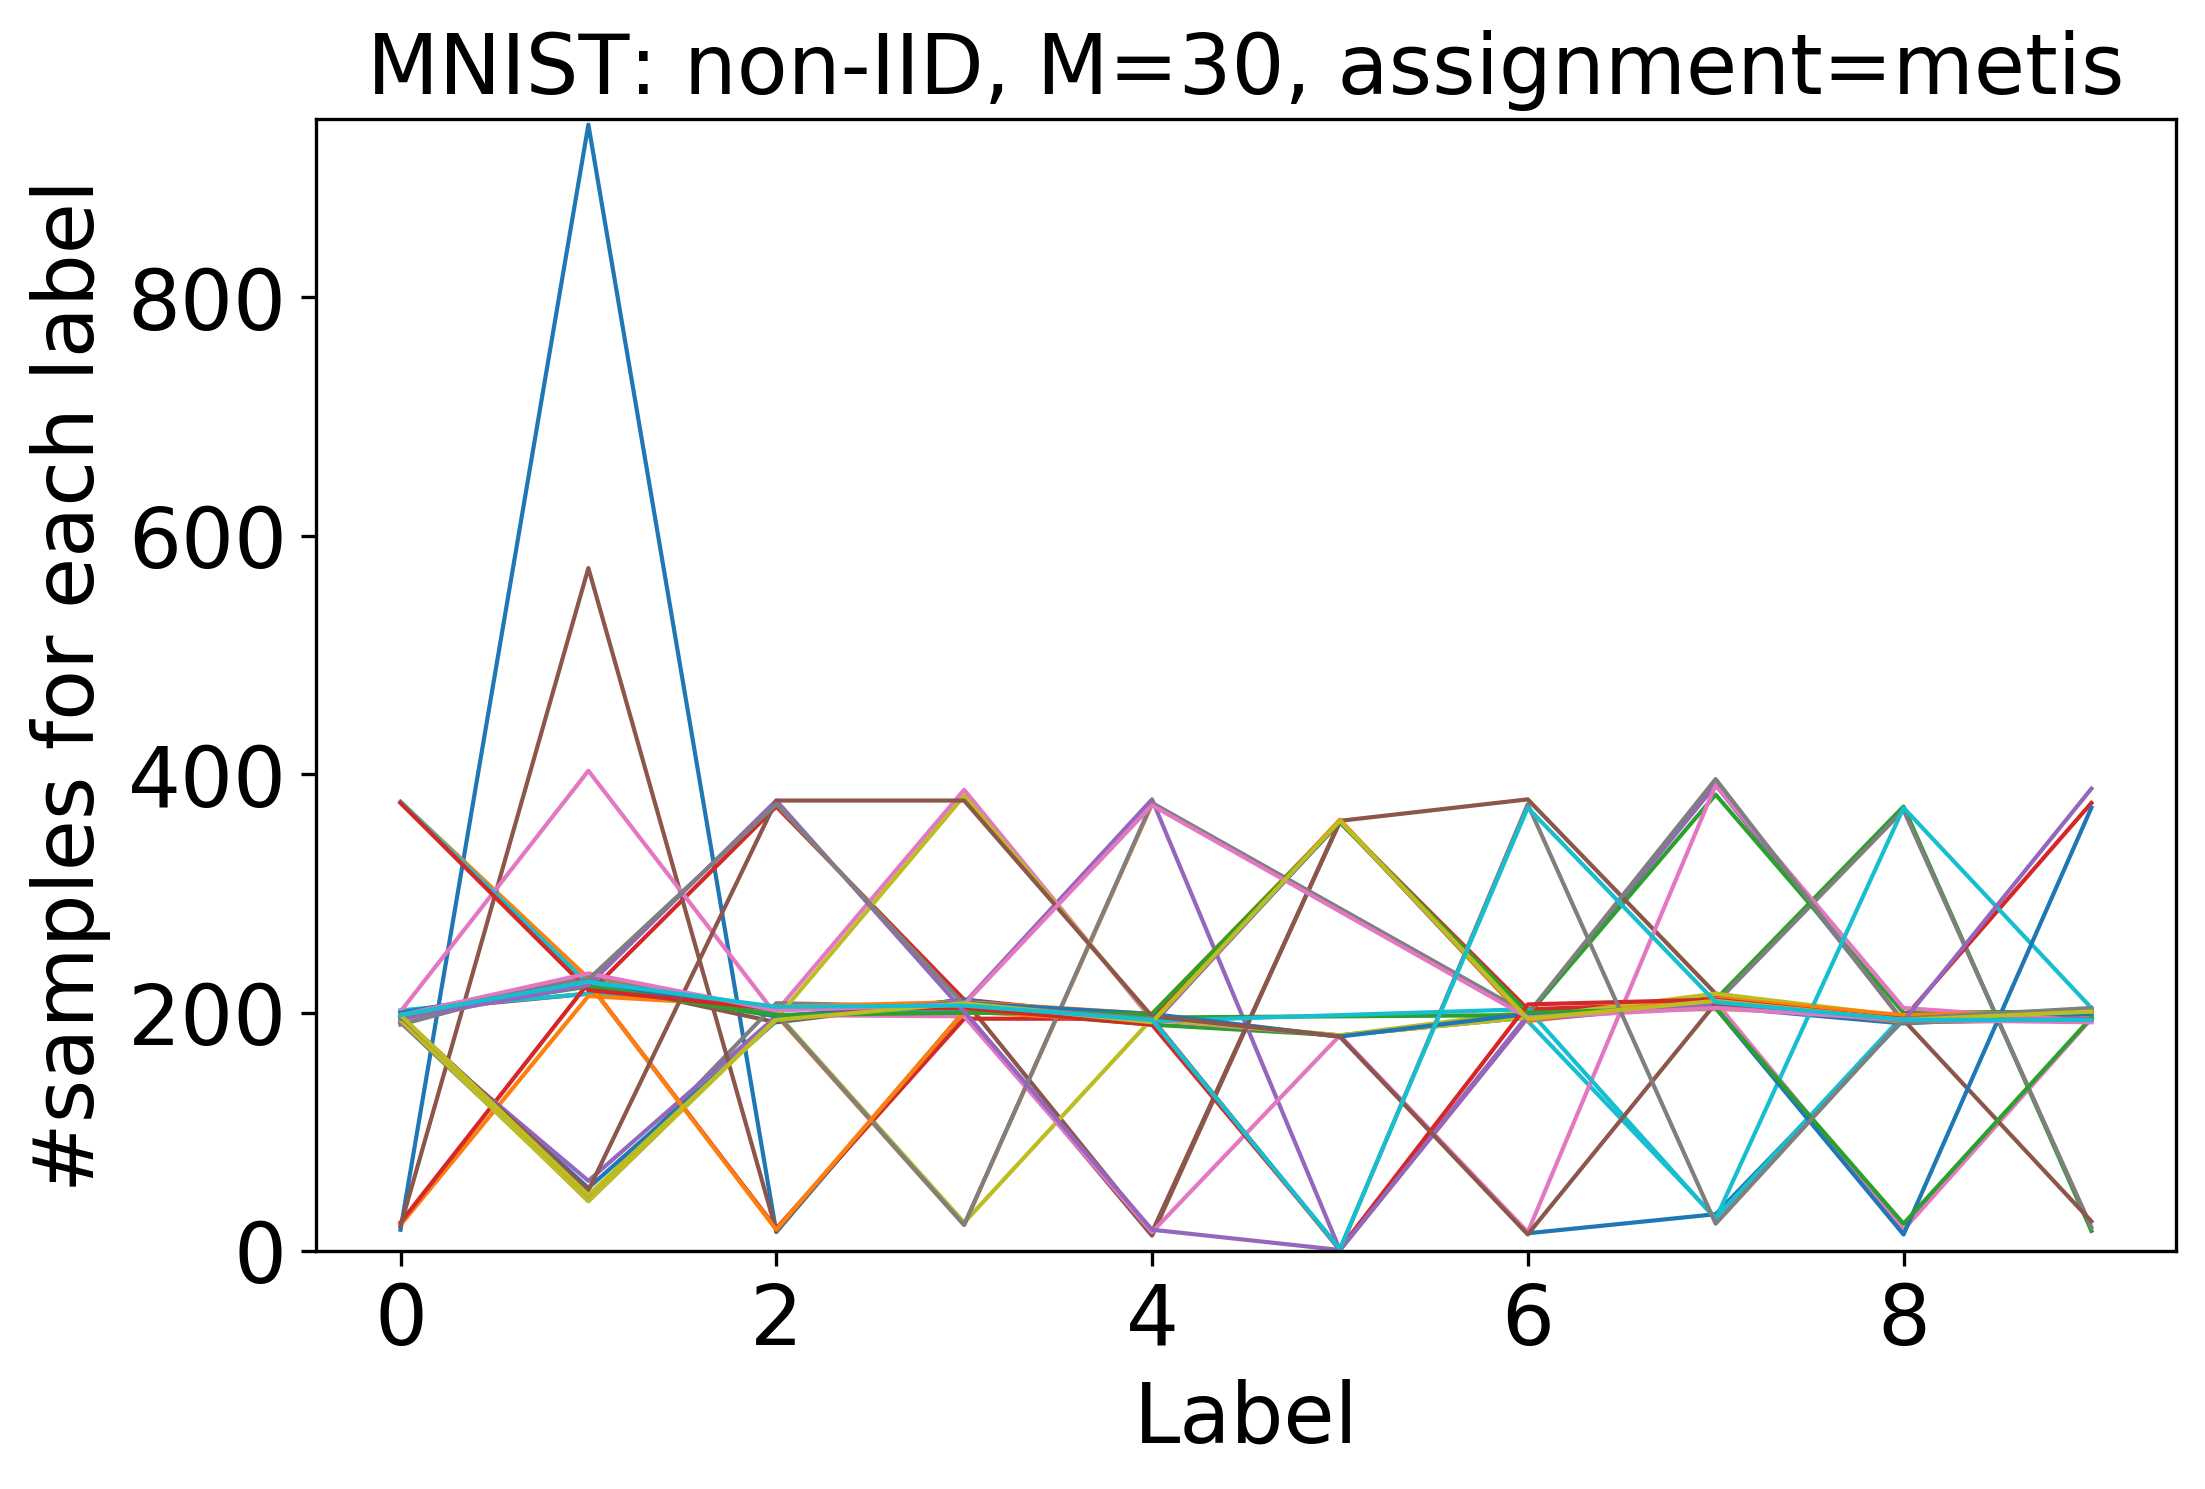

In [26]:

#rnd
#arr_rnd_lines, arr_metis_lines = np.asarray(rnd_lines), np.asarray(metis_lines)

#print(arr_rnd_lines)

ymin_rnd = min([min([min(rnd_lines[i][1]) for i in range(nlines)])])
ymin_metis = min([min([min(metis_lines[i][1]) for i in range(nlines)])])
ymin = max(0, min(ymin_rnd, ymin_metis) - 5)

ymax_rnd = max([max([max(rnd_lines[i][1]) for i in range(nlines)])])
ymax_metis = max([max([max(metis_lines[i][1]) for i in range(nlines)])])
ymax = 5 + max(ymax_rnd, ymax_metis)


fig, ax = plt.subplots(figsize=(8,5))
ax.figure.set_dpi(300)

ax.set_title("MNIST: non-IID, M="+ str(nlines) + ", assignment=rnd", size=fontsize) #random assignment, label_dist_files[0]
for i in range(nlines):
    ax.plot(rnd_lines[i][0], rnd_lines[i][1], linewidth=1)

ax.set_ylabel("#samples for each label", size=fontsize)
ax.set_xlabel("Label", size=fontsize)
ax.set_ylim(ymin = ymin, ymax=ymax)
plt.xticks(fontsize = fontsize)
plt.yticks(fontsize = fontsize)
plt.show()

#metis

fig, ax = plt.subplots(figsize=(8,5))
ax.figure.set_dpi(300)

ax.set_title("MNIST: non-IID, M=" + str(nlines)+ ", assignment=metis", size=fontsize) #metis assignment, label_dist_files[1]
for i in range(nlines):
    ax.plot(metis_lines[i][0], metis_lines[i][1],linewidth=1)

ax.set_ylabel("#samples for each label", size=fontsize)
ax.set_xlabel("Label", size=fontsize)
ax.set_ylim(ymin = ymin, ymax=ymax)
plt.xticks(fontsize = fontsize)
plt.yticks(fontsize = fontsize)
plt.show()
